Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


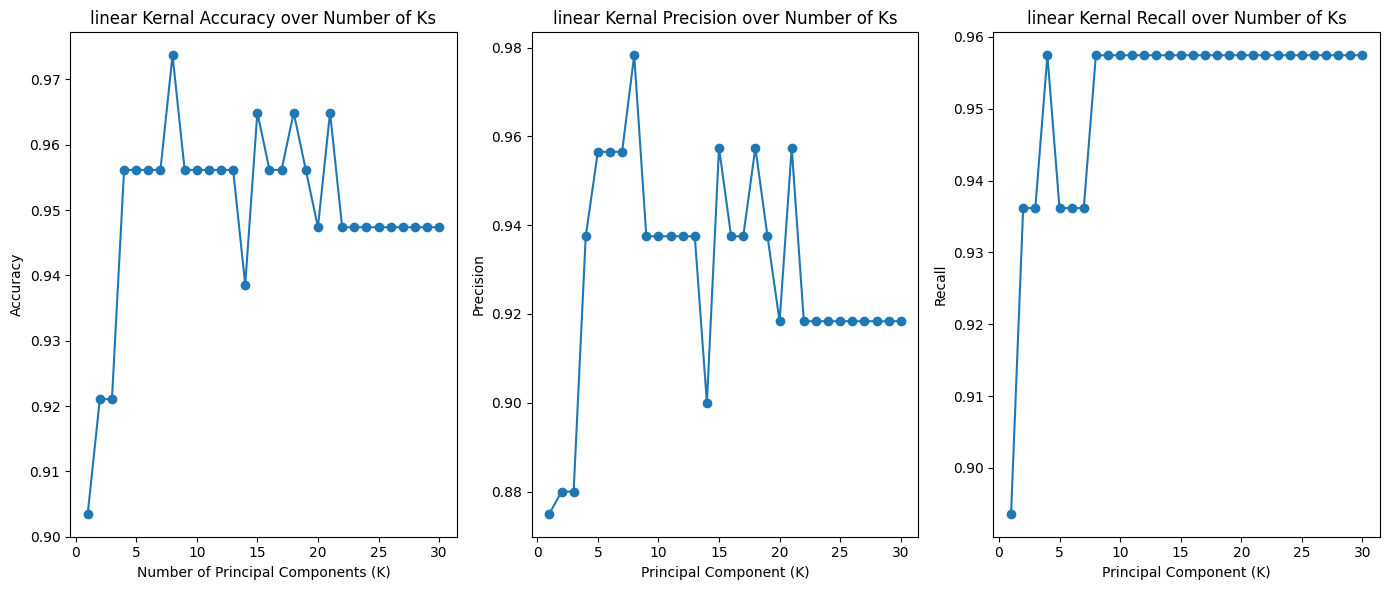

Optimum Number of K Principal Components: 8
linear Highest Accuracy Value: 0.9736842105263158


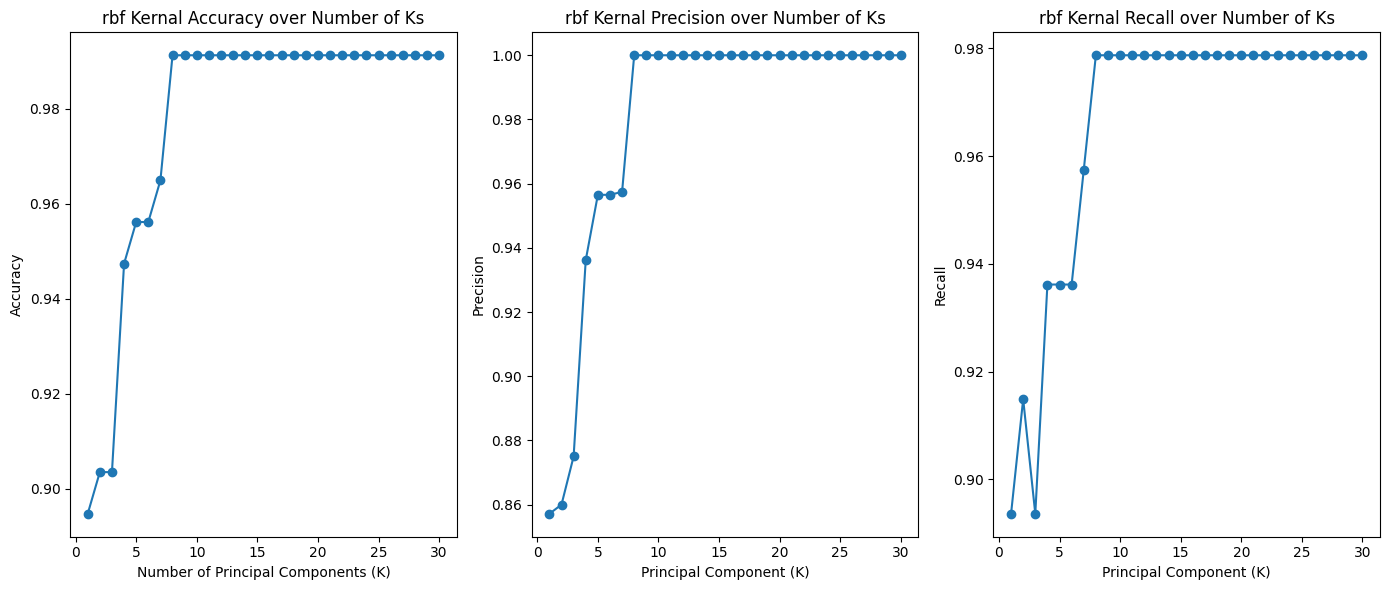

Optimum Number of K Principal Components: 8
rbf Highest Accuracy Value: 0.9912280701754386


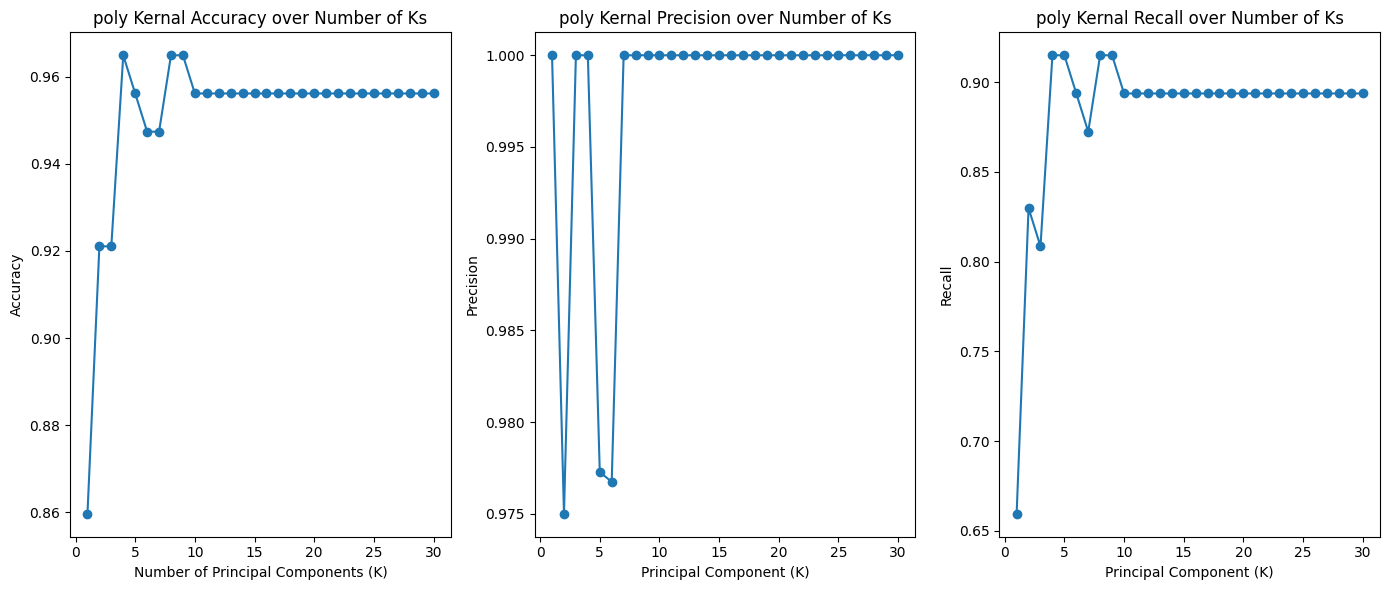

Optimum Number of K Principal Components: 4
poly Highest Accuracy Value: 0.9649122807017544


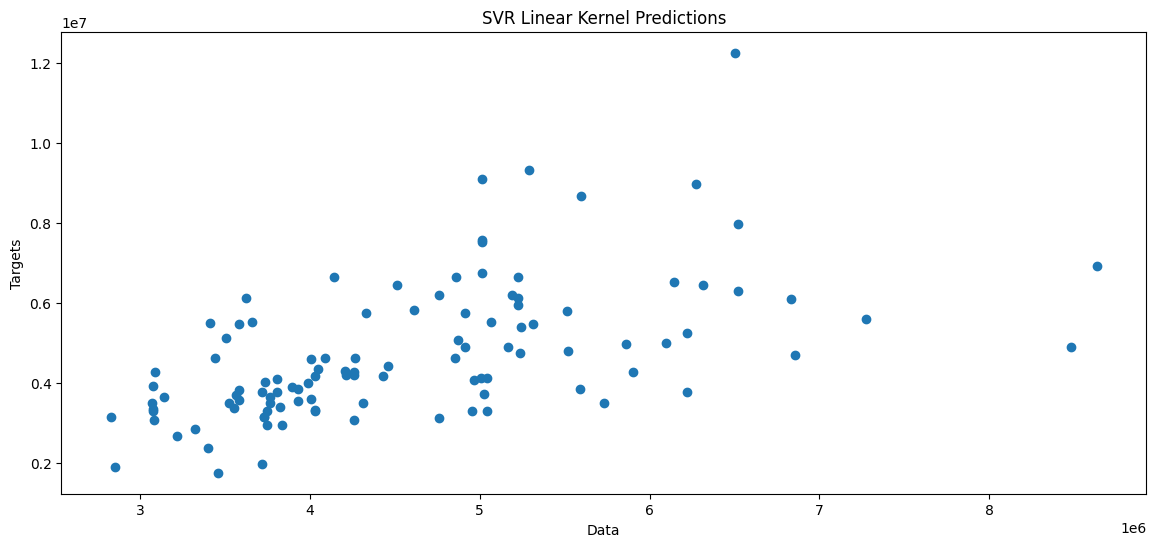

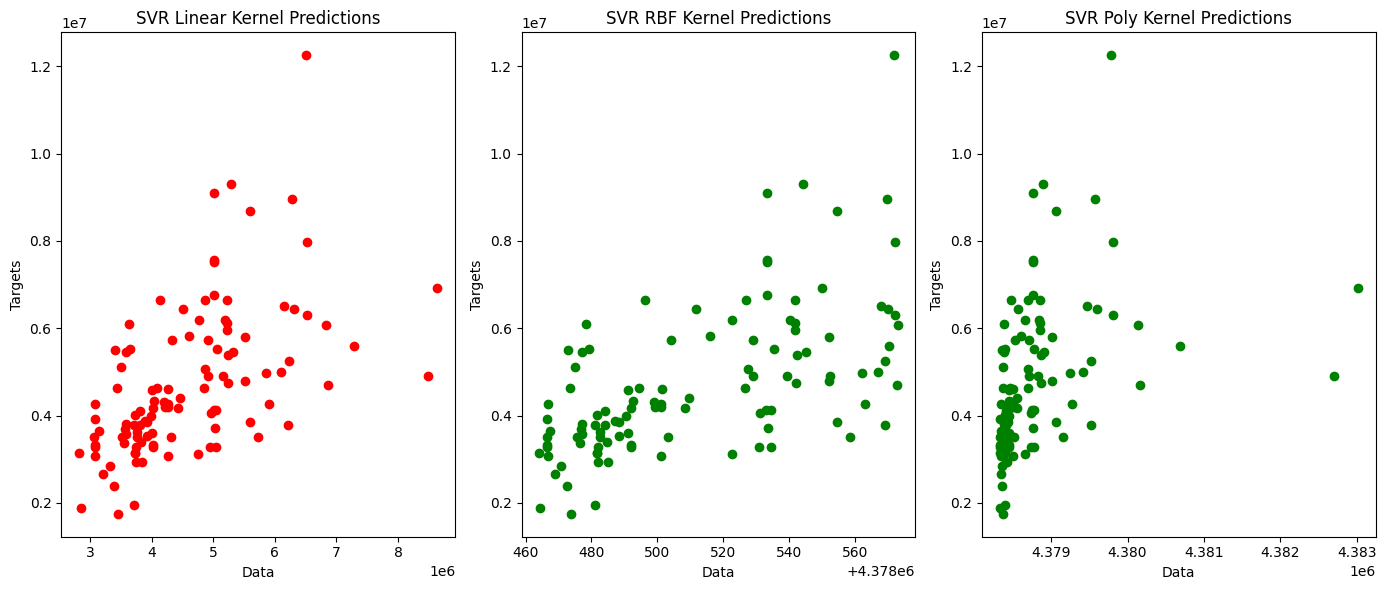

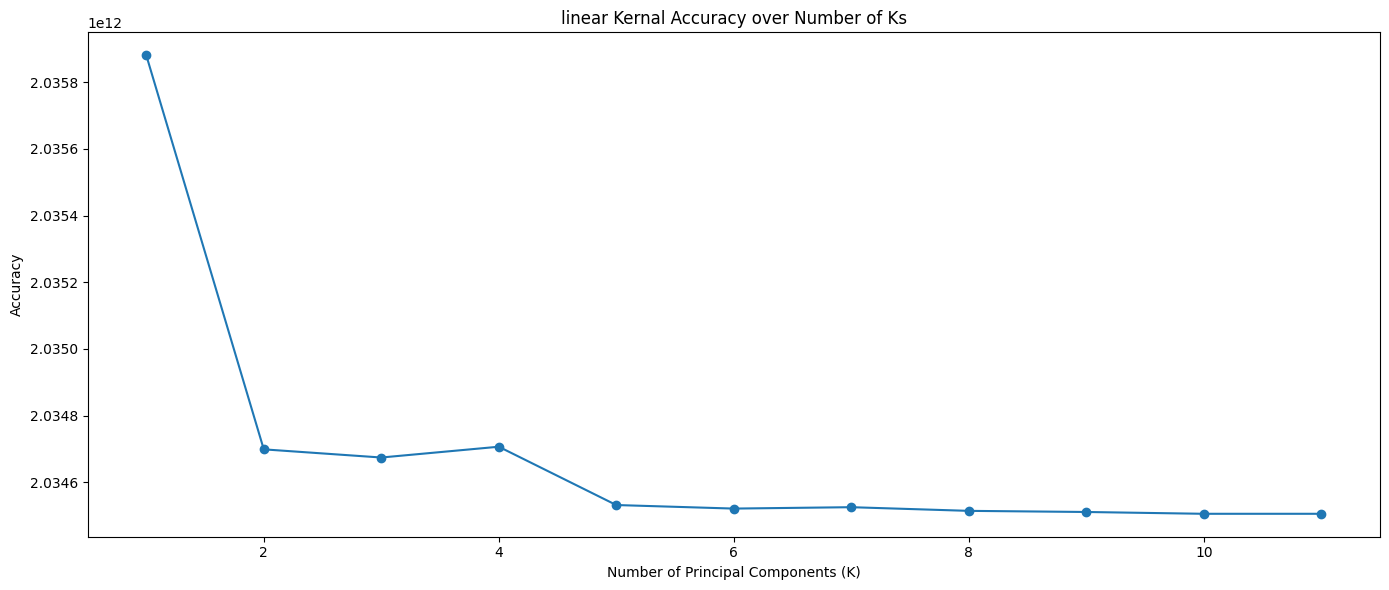

Optimum Number of K Principal Components: 10
linear Highest Regression Accuracy Value: 2034505544168.2795


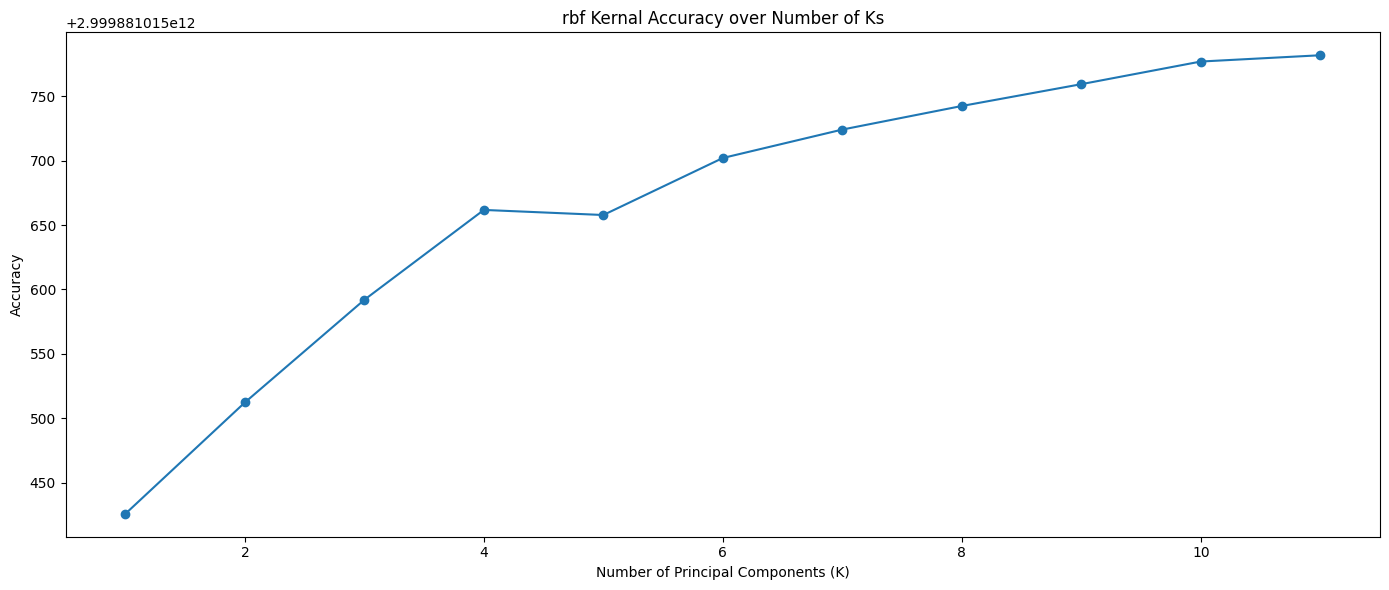

Optimum Number of K Principal Components: 1
rbf Highest Regression Accuracy Value: 2999881015425.815


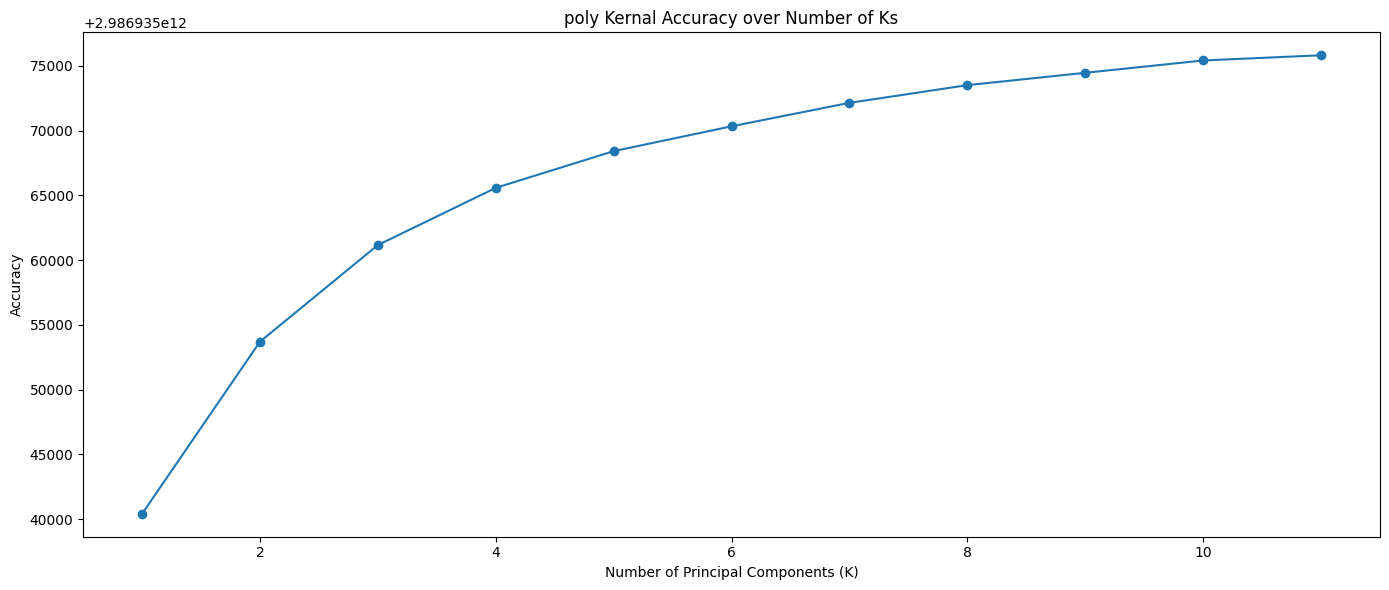

Optimum Number of K Principal Components: 1
poly Highest Regression Accuracy Value: 2986935040409.6714


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')

###################################################

# Problem 1

###################################################

###################################################
# Importing new Dataset
###################################################

file_path = '/content/drive/My Drive/ECGR 4105/Assignment 3/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

###################################################
# Preprocessing
###################################################

# Cleaning data
# Drop the 'Unnamed: 32' column
dataset.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Mapping M and B values of the diagnosis to 1 and 0
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

X = dataset.drop('diagnosis', axis=1)
Y = dataset['diagnosis']

X = StandardScaler().fit_transform(X)

###################################################
# SVM Function
###################################################

def SVM_classifier (X, Y, kernel, K_iterations):
  accuracy_list = []
  precision_list = []
  recall_list = []

  accuracy = 0
  precision = 0
  recall = 0
  best_K = 0
  best_acc = 0

  for k in K_iterations:
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X)

    # Spliting dataset into Training Data and Test Data with an 80% and 20% split between training and evaluation.
    # Training data is used to train our Logistic model.
    # Test data will be used to validate our model.
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

    classifier = SVC(kernel = kernel, C=3)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    precision = metrics.precision_score(Y_test, Y_pred)
    recall = metrics.recall_score(Y_test, Y_pred)
    f1_score = metrics.f1_score(Y_test, Y_pred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)

          # Check if this K has the highest accuracy
    if accuracy > best_acc:
      best_acc = accuracy
      best_K = k

  return accuracy_list, precision_list, recall_list, best_acc, best_K

###################################################
# Plotting SVM Function
###################################################

def SVM_plot (X, Y, kernel, K_iterations):
  accuracy, precision, recall, highest_acc, k_val = SVM_classifier(X, Y, kernel, K_iterations)
  plt.figure(figsize=(14, 6))

  plt.subplot(1, 3, 1)
  plt.plot(K_iterations, accuracy, marker='o')
  plt.title(f'{kernel} Kernal Accuracy over Number of Ks')
  plt.xlabel('Number of Principal Components (K)')
  plt.ylabel('Accuracy')

  plt.subplot(1, 3, 2)
  plt.plot(K_iterations, precision, marker='o')
  plt.title(f'{kernel} Kernal Precision over Number of Ks')
  plt.xlabel('Principal Component (K)')
  plt.ylabel('Precision')

  plt.subplot(1, 3, 3)
  plt.plot(K_iterations, recall, marker='o')
  plt.title(f'{kernel} Kernal Recall over Number of Ks')
  plt.xlabel('Principal Component (K)')
  plt.ylabel('Recall')

  plt.tight_layout()
  plt.show()


  print(f'Optimum Number of K Principal Components: {k_val}')
  print(f'{kernel} Highest Accuracy Value: {highest_acc}')

###################################################
# Executing SVM with different kernel tricks
###################################################

SVM_plot(X, Y, 'linear', range(1, X.shape[1] + 1))
SVM_plot(X, Y, 'rbf', range(1, X.shape[1] + 1))
SVM_plot(X, Y, 'poly', range(1, X.shape[1] + 1))



###################################################

# Problem 2

###################################################

from sklearn.svm import SVR

###################################################
# Importing new Dataset
###################################################
file_path = '/content/drive/My Drive/ECGR 4105/Assignment2/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

###################################################
# Preprocessing
###################################################

x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
y_vars = 'price'

# Changing 'yes' and 'no' to 1 and 0
X = dataset[x_vars]
X = pd.get_dummies(X, drop_first=True)
y = dataset[y_vars]

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###################################################
# Linear SVR Scatter Plot
###################################################

classifier = SVR(kernel = 'linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

plt.figure(figsize=(14, 6))

plt.scatter(y_pred, y_test)
plt.xlabel('Data')
plt.ylabel('Targets')
plt.title('SVR Linear Kernel Predictions')
plt.show()

###################################################
# Kernel Scatter Plots
###################################################

classifier = SVR(kernel = 'linear')
classifier.fit(X_train, y_train)

y_pred_linear = classifier.predict(X_test)

classifier = SVR(kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred_rbf = classifier.predict(X_test)

classifier = SVR(kernel = 'poly')
classifier.fit(X_train, y_train)

y_pred_poly = classifier.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_linear, y_test, color = 'red')
plt.xlabel('Data')
plt.ylabel('Targets')
plt.title('SVR Linear Kernel Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_pred_rbf, y_test, color = 'green')
plt.xlabel('Data')
plt.ylabel('Targets')
plt.title('SVR RBF Kernel Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_pred_poly, y_test, color = 'green')
plt.xlabel('Data')
plt.ylabel('Targets')
plt.title('SVR Poly Kernel Predictions')

plt.tight_layout()
plt.show()

###################################################
# SVR Function
###################################################

def SVR_classifier (X, Y, kernel, K_iterations):
  mse_list = [] # Mean squared error as accuracy metric

  mse = 0
  best_K = 0
  best_mse = float('inf')  # Initializing with a large value

  for k in K_iterations:
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X)

    # Spliting dataset into Training Data and Test Data with an 80% and 20% split between training and evaluation.
    # Training data is used to train our Logistic model.
    # Test data will be used to validate our model.
    X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

    classifier = SVR(kernel = kernel, C=3)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    mse = metrics.mean_squared_error(Y_test, Y_pred)  # Calculate Mean Squared Error

    mse_list.append(mse)

    # Check if this K has the lowest MSE (best accuracy)
    if mse < best_mse:
      best_mse = mse
      best_K = k

  return mse_list, best_mse, best_K  # Return relevant metrics

###################################################
# Plotting SVR Function
###################################################

def SVR_plot (X, Y, kernel, K_iterations):
  mse_values, lowest_mse, k_val = SVR_classifier(X, Y, kernel, K_iterations)
  plt.figure(figsize=(14, 6))

  plt.plot(K_iterations, mse_values, marker='o')
  plt.title(f'{kernel} Kernal Accuracy over Number of Ks')
  plt.xlabel('Number of Principal Components (K)')
  plt.ylabel('Accuracy')

  plt.tight_layout()
  plt.show()

  print(f'Optimum Number of K Principal Components: {k_val}')
  print(f'{kernel} Highest Regression Accuracy Value: {lowest_mse}')

SVR_plot(X, y, 'linear', range(1, X.shape[1] + 1))
SVR_plot(X, y, 'rbf', range(1, X.shape[1] + 1))
SVR_plot(X, y, 'poly', range(1, X.shape[1] + 1))